In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv("Training.csv")
test = pd.read_csv("Testing.csv")

train.head(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
test.head(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy


In [ ]:
train = train.drop('Unnamed: 133', axis=1)

train.isna().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


In [ ]:
Dis = train[["prognosis"]];
X = train.drop(["prognosis"],axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xvalid,ytrain,yvalid = train_test_split(X,Dis,test_size=0.2,random_state=1)

print(f"Train: {xtrain.shape}, {ytrain.shape}")
print(f"Valid: {xvalid.shape}, {yvalid.shape}")

Train: (3936, 132), (3936, 1)
Valid: (984, 132), (984, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

ytrain = np.array(ytrain).ravel()

knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

voting_clf = VotingClassifier(estimators=[('knn', knn), ('rf', rf)], voting='hard')

voting_clf.fit(xtrain, ytrain)

training_pred = voting_clf.predict(xtrain)
valid_pred = voting_clf.predict(xvalid)

print("Training accuracy is:", accuracy_score(ytrain , training_pred))
print("Validation accuracy is:", accuracy_score(yvalid , valid_pred))

training accuracy is: 1.0
Validation accuracy is: 1.0


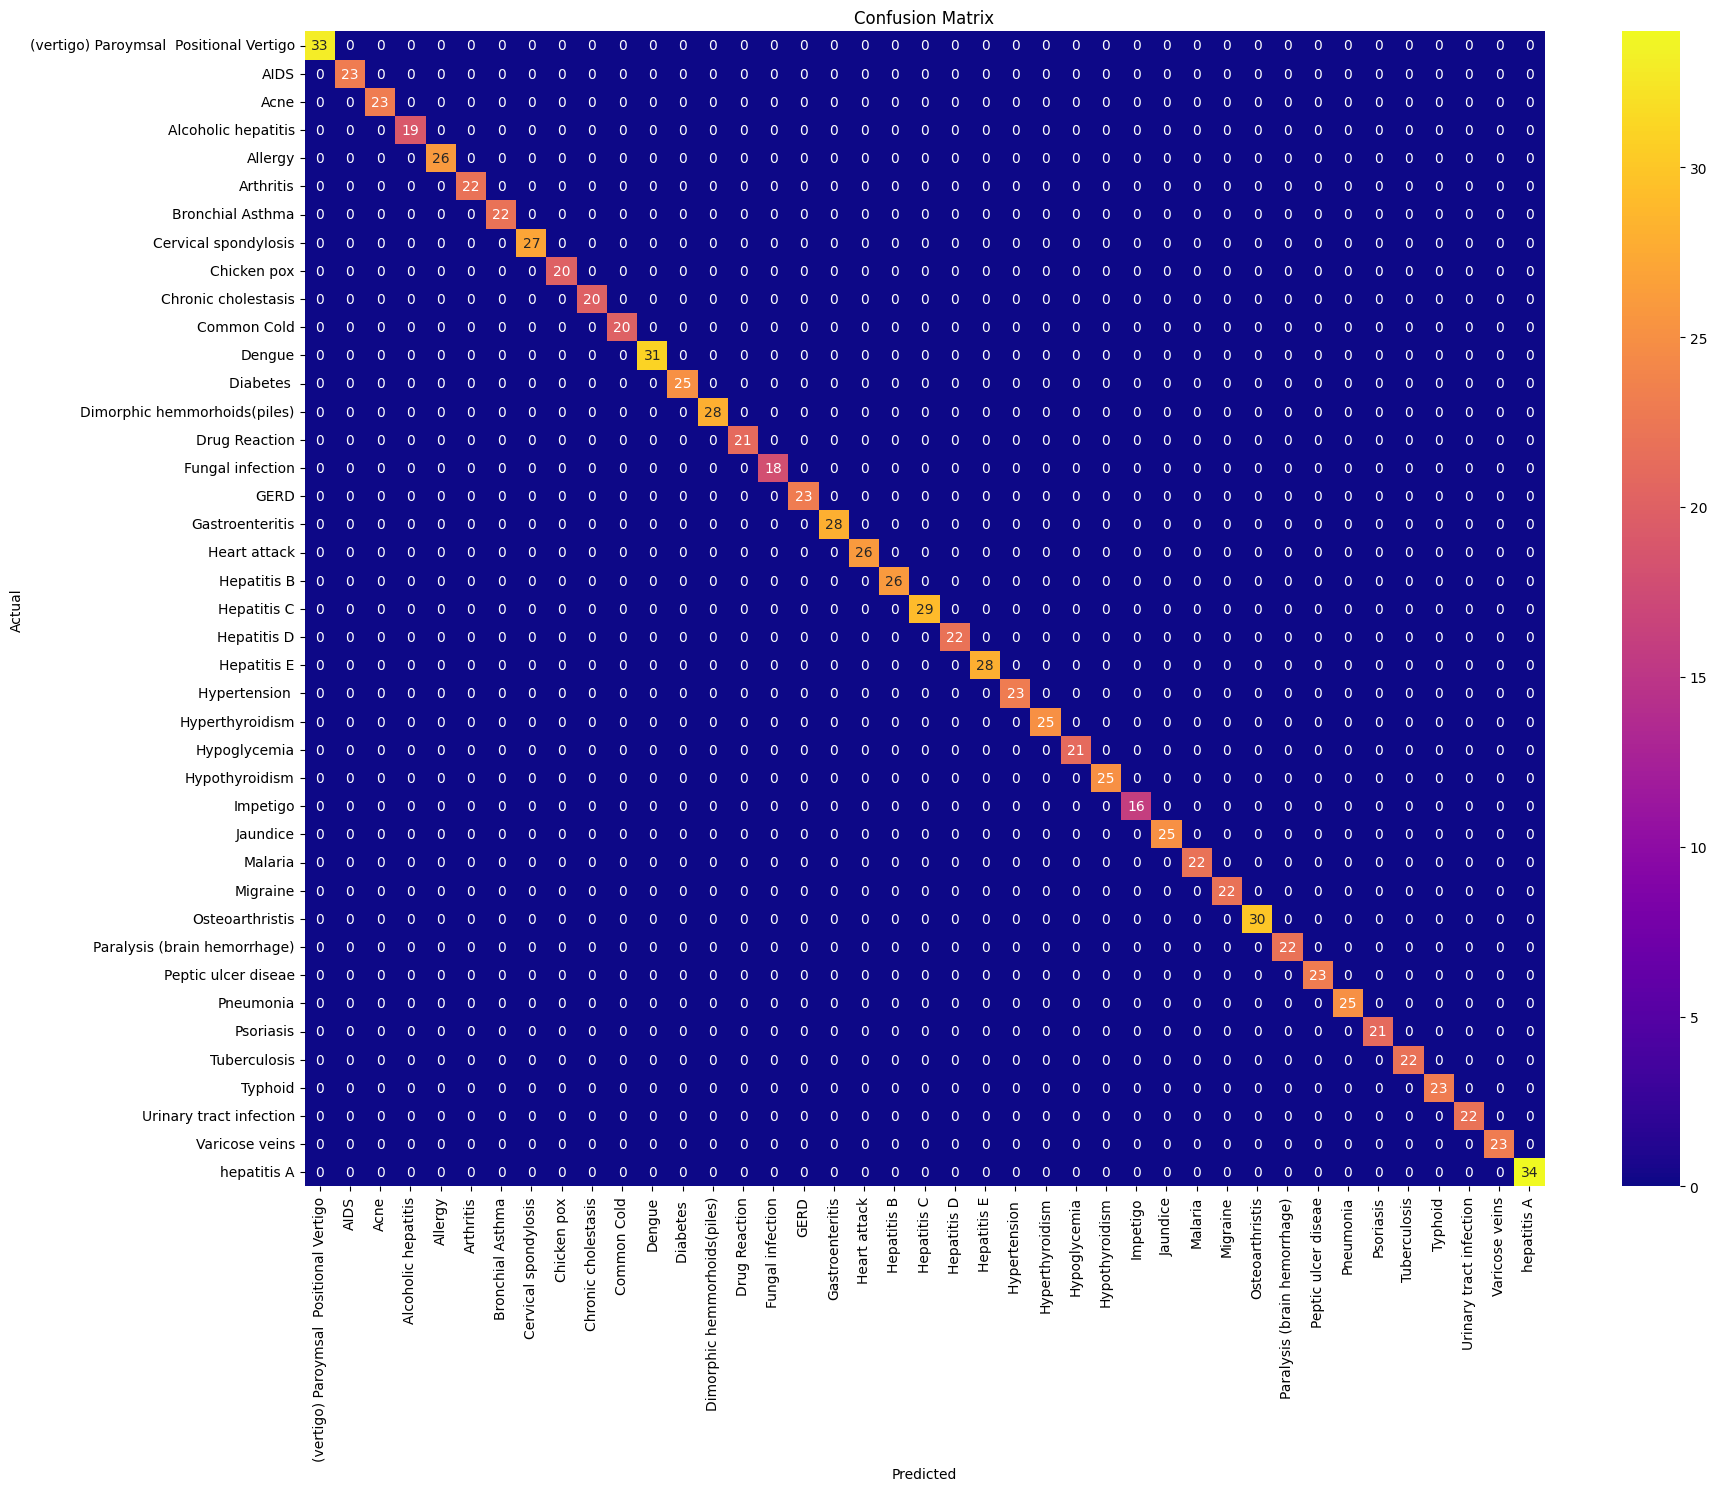

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(yvalid, valid_pred)
# print(conf_matrix)

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma', xticklabels=np.unique(Dis), yticklabels=np.unique(Dis))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
ytest = test['prognosis']
xtest = test.drop(['prognosis'], axis = 1)
y_pred = voting_clf.predict(xtest)

In [ ]:
print("Testing Data accuracy is:", accuracy_score(ytest, y_pred))

Testing Data accuracy is: 1.0


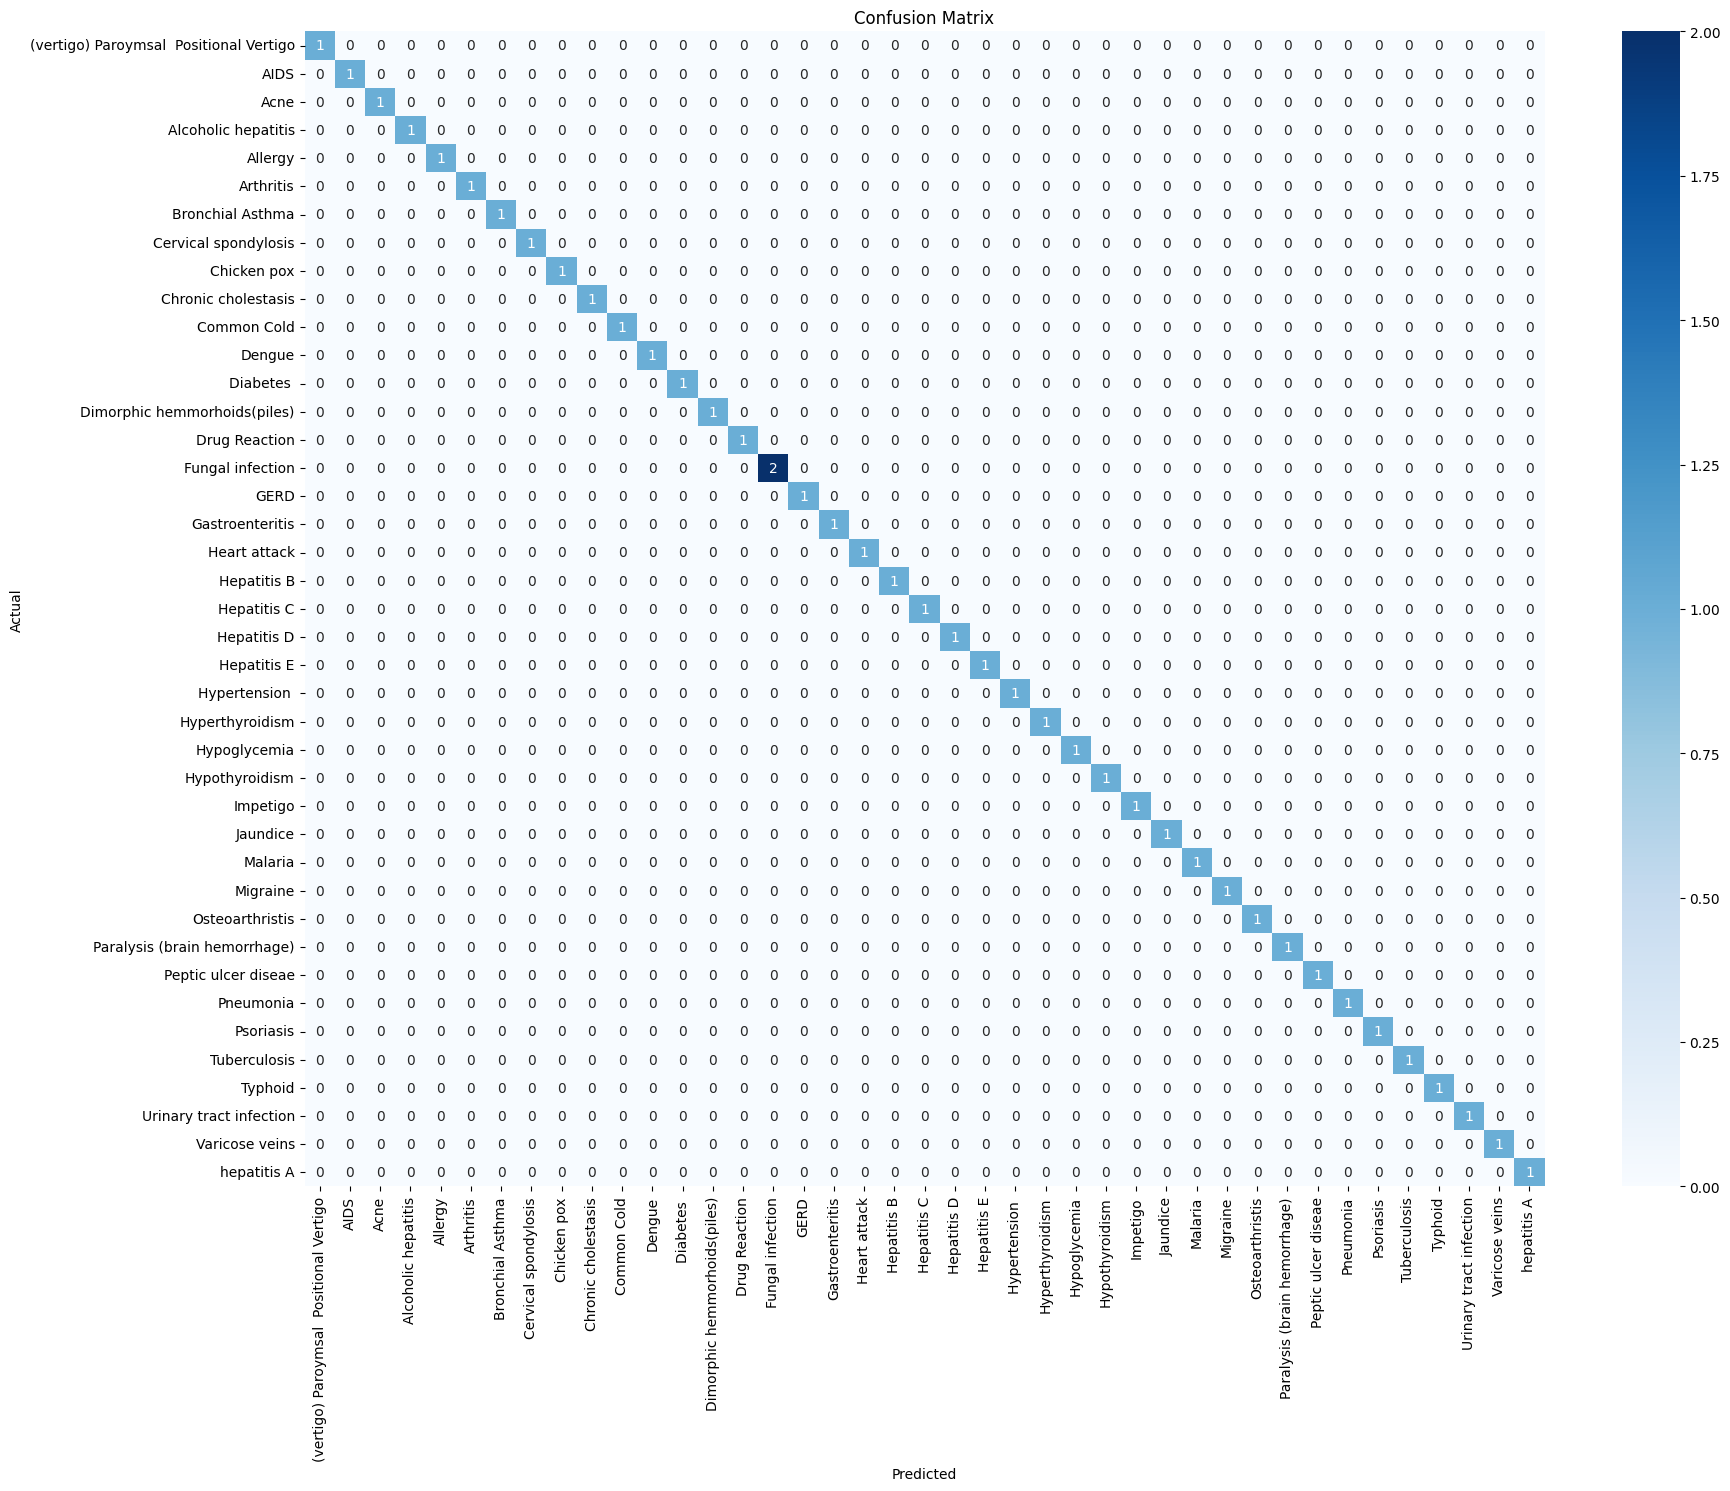

In [ ]:
conf_matrix = confusion_matrix(ytest, y_pred)
# print(conf_matrix)

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Dis), yticklabels=np.unique(Dis))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()